In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")
data

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [4]:
np.unique(data['Customer ID'])

array([ 1000,  1002,  1003, ..., 19996, 19997, 19998], dtype=int64)

In [5]:
data.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [6]:
data.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

<Axes: >

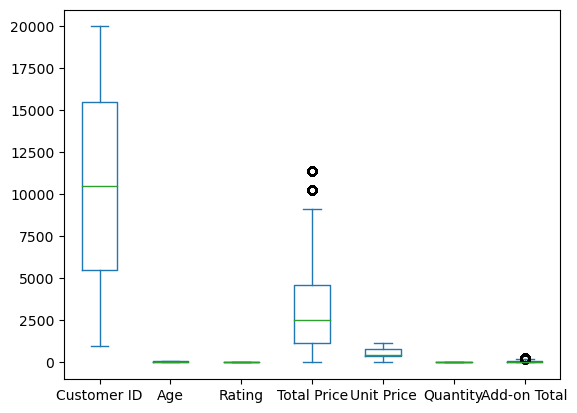

In [7]:
data.plot(kind = 'box')

In [10]:
data.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [29]:
#Korelasi

correlation_matrix = data[['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']].corr()
correlation_matrix

,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
Age,1.000000,0.002949,0.003096,-0.004402,0.008555,-0.005291
Rating,0.002949,1.000000,-0.232429,-0.343829,-0.008587,-0.044338
Total Price,0.003096,-0.232429,1.000000,0.673951,0.653872,0.083924
Unit Price,-0.004402,-0.343829,0.673951,1.000000,0.006715,0.125189
Quantity,0.008555,-0.008587,0.653872,0.006715,1.000000,0.003419
Add-on Total,-0.005291,-0.044338,0.083924,0.125189,0.003419,1.000000


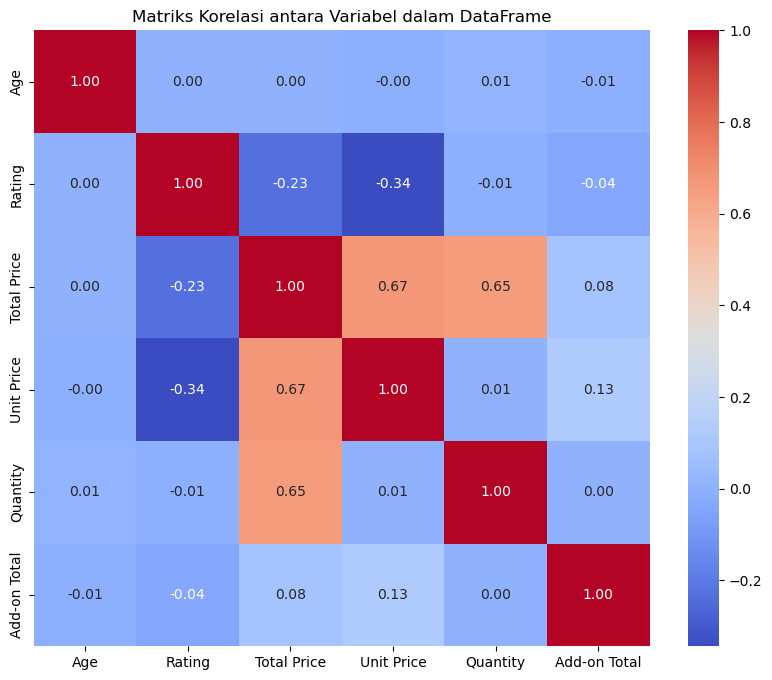

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data[['Age', 'Rating', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']].corr()

# Mengatur ukuran figure
plt.figure(figsize=(10, 8))

# Membuat heatmap dari matriks korelasi
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Menambahkan judul
plt.title('Matriks Korelasi antara Variabel dalam DataFrame')
plt.show()

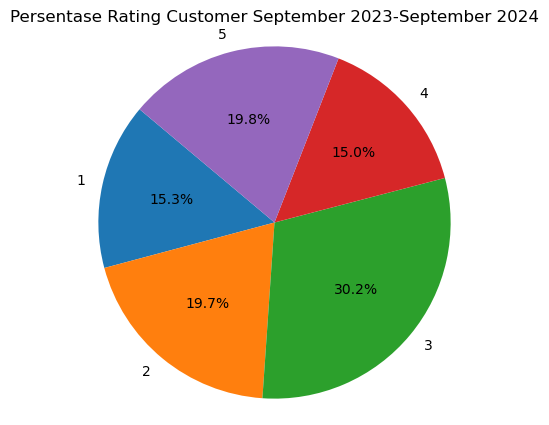

In [26]:
most_wasted = data.groupby(["Rating"])[['Customer ID']].sum()

plt.figure(figsize=(5, 5))
plt.pie(most_wasted['Customer ID'], labels=most_wasted.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Persentase Rating Customer September 2023-September 2024')
plt.show()

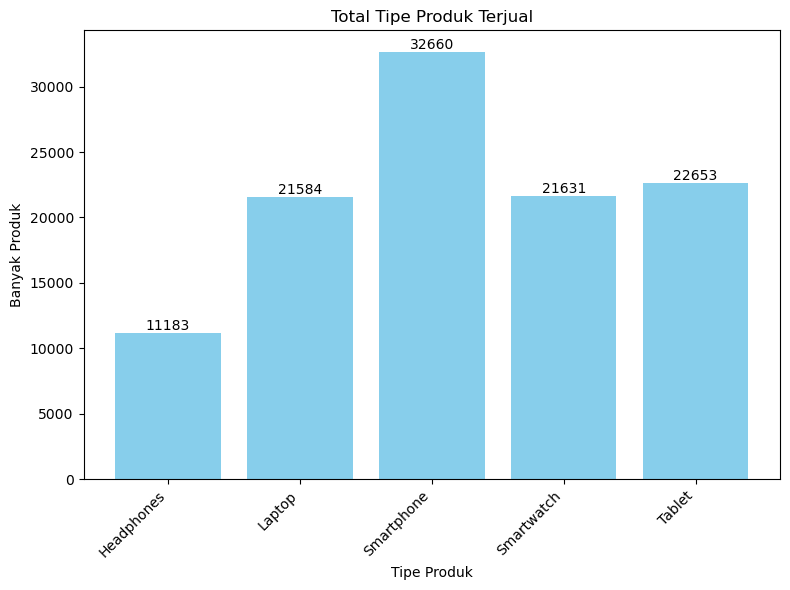

In [27]:
summ = data.groupby(["Product Type"])[['Quantity']].sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(summ.index, summ['Quantity'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Tipe Produk')
plt.ylabel('Banyak Produk')
plt.title('Total Tipe Produk Terjual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()